In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl

In [2]:
dataset = pd.read_csv('Bakery sales.csv')
dataset.head()

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"


In [3]:
dataset.describe()

,Unnamed: 0,ticket_number,Quantity
count,234005.000000,234005.000000,234005.000000
mean,255205.035854,219201.258738,1.538377
std,147501.625992,40053.223896,1.289603
min,0.000000,150040.000000,-200.000000
25%,127979.000000,184754.000000,1.000000
50%,254573.000000,218807.000000,1.000000
75%,382911.000000,253927.000000,2.000000
max,511395.000000,288913.000000,200.000000


In [4]:
dataset.isna().values.any()

False

In [5]:
dataset.columns

Index(['Unnamed: 0', 'date', 'time', 'ticket_number', 'article', 'Quantity',
       'unit_price'],
      dtype='object')

In [6]:
dataset['article'].unique()

array(['BAGUETTE', 'PAIN AU CHOCOLAT', 'PAIN', 'TRADITIONAL BAGUETTE',
       'CROISSANT', 'BANETTE', 'BANETTINE', 'SPECIAL BREAD', 'COUPE',
       'SAND JB EMMENTAL', 'KOUIGN AMANN', 'BOULE 200G', 'BOULE 400G',
       'GAL FRANGIPANE 6P', 'CAMPAGNE', 'MOISSON', 'CAFE OU EAU',
       'BRIOCHE', 'CEREAL BAGUETTE', 'SEIGLE', 'COMPLET',
       'DIVERS PATISSERIE', 'GAL FRANGIPANE 4P', 'COOKIE', 'FICELLE',
       'PAIN AUX RAISINS', 'GAL POMME 6P', 'GAL POMME 4P', 'FINANCIER X5',
       'VIK BREAD', 'DIVERS VIENNOISERIE', 'GACHE', 'SANDWICH COMPLET',
       'PAIN BANETTE', 'GRAND FAR BRETON', 'QUIM BREAD',
       'SPECIAL BREAD KG', 'GD KOUIGN AMANN', 'BOULE POLKA',
       'DEMI BAGUETTE', 'CHAUSSON AUX POMMES', 'BAGUETTE GRAINE',
       'DIVERS CONFISERIE', 'SUCETTE', 'DIVERS BOULANGERIE',
       'BOISSON 33CL', 'PATES', 'FORMULE SANDWICH', 'DIVERS SANDWICHS',
       'CROISSANT AMANDES', 'PAIN CHOCO AMANDES', 'SACHET VIENNOISERIE',
       'NANTAIS', 'CHOCOLAT', 'PAIN S/SEL', 'FONDANT CHOC

In [7]:
dataset.dtypes

Unnamed: 0         int64
date              object
time              object
ticket_number    float64
article           object
Quantity         float64
unit_price        object
dtype: object

In [8]:
dataset['price'] = dataset['unit_price'].str.split(' ').str[0]
dataset = dataset.drop('unit_price', axis=1)
dataset = dataset.drop('Unnamed: 0', axis=1)
dataset['price']=dataset['price'].str.replace(',','.')

In [9]:
dataset

,date,time,ticket_number,article,Quantity,price
0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,0.90
1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,1.20
2,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,1.20
3,2021-01-02,09:14,150041.0,PAIN,1.0,1.15
4,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,1.20
...,...,...,...,...,...,...
234000,2022-09-30,18:52,288911.0,COUPE,1.0,0.15
234001,2022-09-30,18:52,288911.0,BOULE 200G,1.0,1.20
234002,2022-09-30,18:52,288911.0,COUPE,2.0,0.15
234003,2022-09-30,18:55,288912.0,TRADITIONAL BAGUETTE,1.0,1.30


In [10]:
 dataset.loc[0, 'date']

'2021-01-02'

In [11]:
dataset['date']=pd.to_datetime(dataset['date'])

In [12]:
dataset

,date,time,ticket_number,article,Quantity,price
0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,0.90
1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,1.20
2,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,1.20
3,2021-01-02,09:14,150041.0,PAIN,1.0,1.15
4,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,1.20
...,...,...,...,...,...,...
234000,2022-09-30,18:52,288911.0,COUPE,1.0,0.15
234001,2022-09-30,18:52,288911.0,BOULE 200G,1.0,1.20
234002,2022-09-30,18:52,288911.0,COUPE,2.0,0.15
234003,2022-09-30,18:55,288912.0,TRADITIONAL BAGUETTE,1.0,1.30


In [13]:
 dataset.loc[0, 'date'].day_name()

'Saturday'

In [14]:
dataset['Day name']=dataset['date'].dt.day_name()

In [15]:
dataset

,date,time,ticket_number,article,Quantity,price,Day name
0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,0.90,Saturday
1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,1.20,Saturday
2,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,1.20,Saturday
3,2021-01-02,09:14,150041.0,PAIN,1.0,1.15,Saturday
4,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,1.20,Saturday
...,...,...,...,...,...,...,...
234000,2022-09-30,18:52,288911.0,COUPE,1.0,0.15,Friday
234001,2022-09-30,18:52,288911.0,BOULE 200G,1.0,1.20,Friday
234002,2022-09-30,18:52,288911.0,COUPE,2.0,0.15,Friday
234003,2022-09-30,18:55,288912.0,TRADITIONAL BAGUETTE,1.0,1.30,Friday


In [16]:
all_articles=dataset['article'].unique()

Presenting sales of several products depending on the day of the week

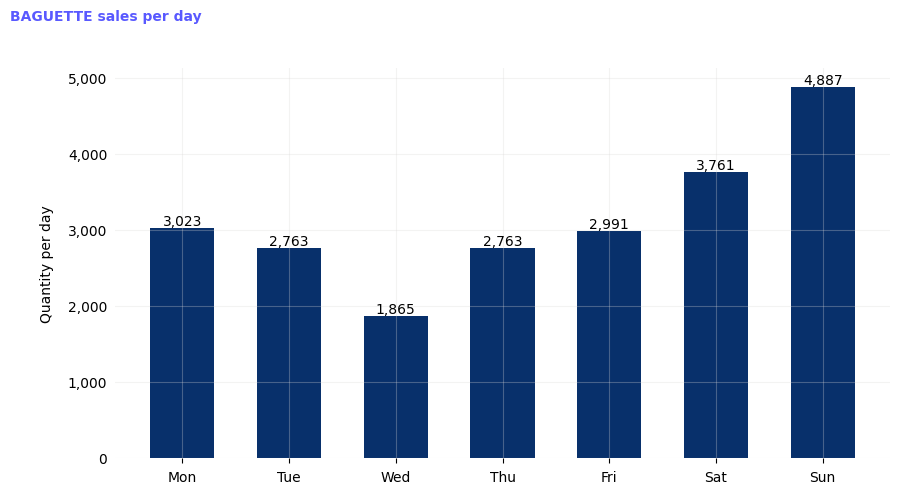

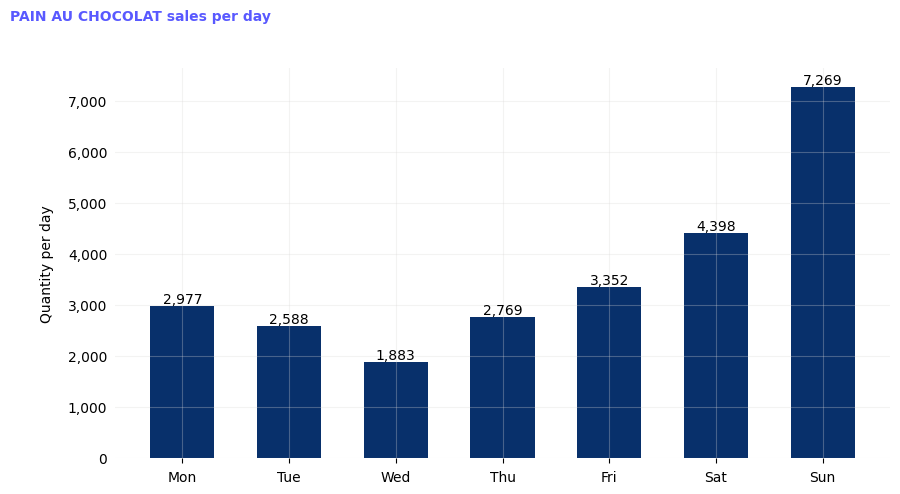

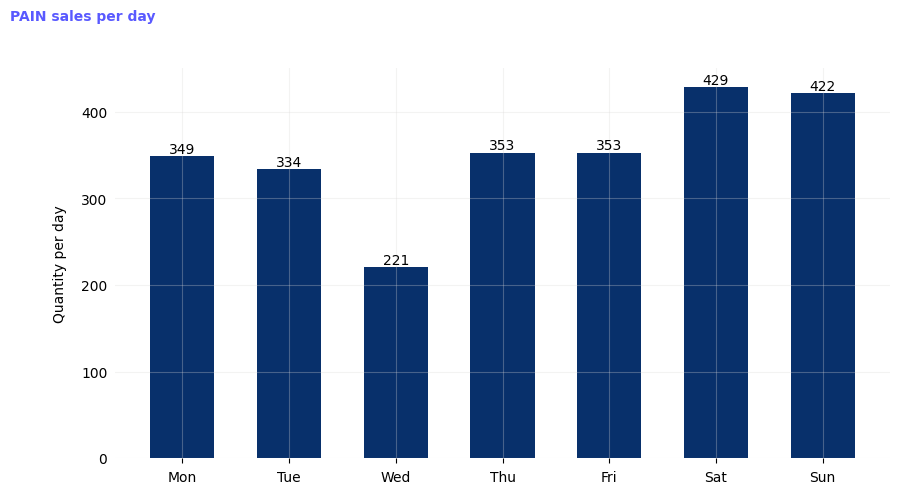

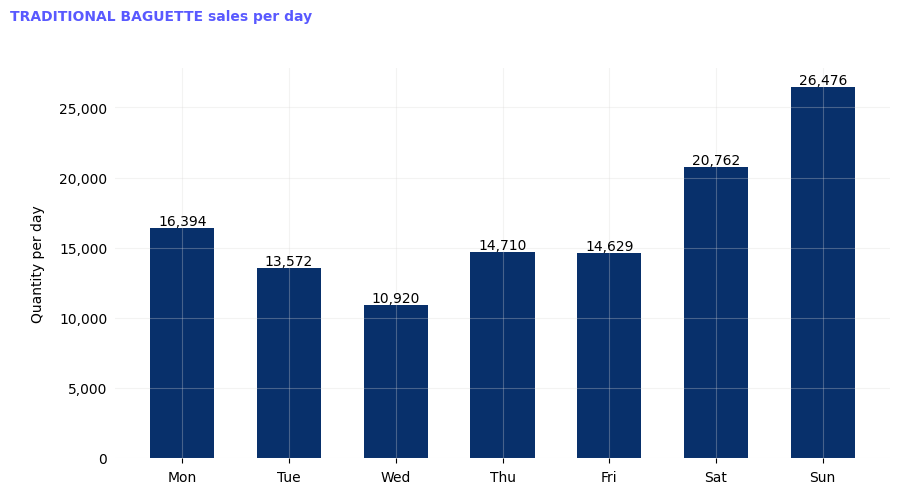

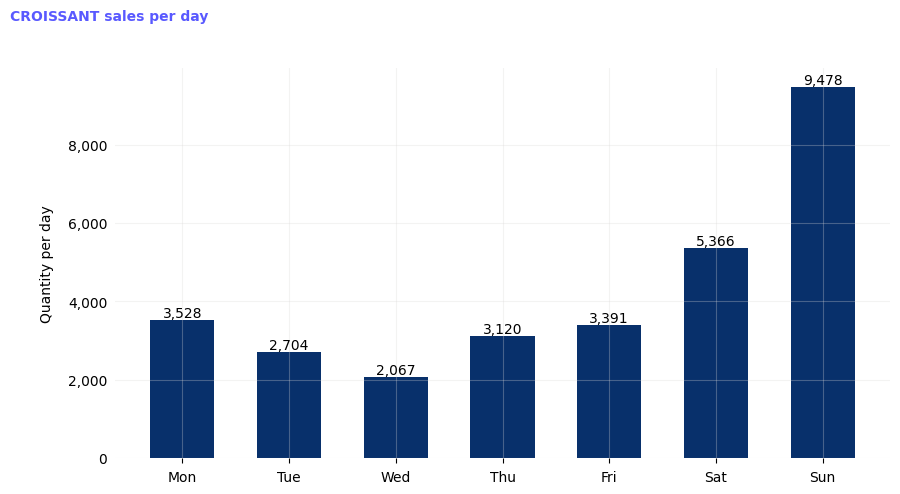

In [17]:
articles=dataset['article'].unique()
number_of_plots=5
plot_number=0
for article in articles:
    if plot_number==number_of_plots:
        break
    #how many plots?
    plot_number=plot_number+1
    
    single_df = dataset[dataset['article'] == article]

    day_data = single_df.groupby(['article', 'Day name'])['Quantity'].sum()
    day_data = day_data.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], level=1)
    day_data = day_data.reset_index()

    day_ind = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    day_data['Day'] = day_ind
    
    article_name=article
    cmap = mpl.colormaps['Blues']
    fig, ax = plt.subplots(figsize=(10, 6), dpi = 100)
    #grids
    ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.3, zorder=0)
    ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.3, zorder=0)

    #x axis
    ax.set_xlabel('', fontsize=12, labelpad=10)
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.xaxis.set_tick_params(pad=5, labelbottom=True, bottom=True, labelsize=10, labelrotation=0)

    #text
    ax.spines[['top','left','bottom','right']].set_visible(False)
    ax.text(x=0.02, y=.93, s=article_name + ' sales per day', transform=fig.transFigure, fontsize=10, weight='bold', alpha=.65, font='sans serif', color='blue')
    
    #y axis
    ax.set_ylabel('Quantity per day', fontsize=10, labelpad=10)
    ax.yaxis.set_label_position("left")
    ax.yaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
    ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=10)
    plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85, wspace=None, hspace=None)


    bar_container = ax.bar(day_data['Day'], day_data['Quantity'], width=0.6, color=cmap(np.linalg.norm(day_data['Quantity'])))
    ax.bar_label(bar_container, fmt='{:,.0f}',fontsize=10)

In [18]:
#TODO

#prediction of daily sales of each article
#create and empty dataframe with next 28 days and predict for them for these days predict the sales of each article
# forecast
# - weather
# - holiday
# - EDA

In [19]:
dataset['Day'] = dataset['date'].dt.strftime('%d')
dataset['Month'] = dataset['date'].dt.strftime('%m')
dataset['Year'] = dataset['date'].dt.strftime('%Y')
dataset['Quarter'] = dataset['date'].dt.quarter

year_analysis=dataset.loc[dataset['Year']=='2021']
month22_dataset=year_analysis.groupby(['Month'])['Quantity'].sum().reset_index()
month22_dataset['Quantity'] = (month22_dataset['Quantity'] / 1000).round(1)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec']
month22_dataset['Months']=months
month22_dataset['price']=dataset['price'].astype(float)

In [20]:
year_analysis=dataset.loc[dataset['Year']=='2021']
year_analysis['price']=dataset['price'].astype(float)
year_analysis['Transaction earnings'] = year_analysis.Quantity*year_analysis.price
earnings_dataset=year_analysis.groupby(['Month'])['Transaction earnings'].sum().reset_index()
earnings_dataset['Transaction earnings'] = (earnings_dataset['Transaction earnings'] / 1000).round(2)
earnings_dataset['Months']=months
year_analysis.head()

C:\Users\User\AppData\Local\Temp\ipykernel_26404\2304004470.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_analysis['price']=dataset['price'].astype(float)
C:\Users\User\AppData\Local\Temp\ipykernel_26404\2304004470.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_analysis['Transaction earnings'] = year_analysis.Quantity*year_analysis.price


,date,time,ticket_number,article,Quantity,price,Day name,Day,Month,Year,Quarter,Transaction earnings
0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,0.90,Saturday,02,01,2021,1,0.90
1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,1.20,Saturday,02,01,2021,1,3.60
2,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,1.20,Saturday,02,01,2021,1,2.40
3,2021-01-02,09:14,150041.0,PAIN,1.0,1.15,Saturday,02,01,2021,1,1.15
4,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,1.20,Saturday,02,01,2021,1,6.00


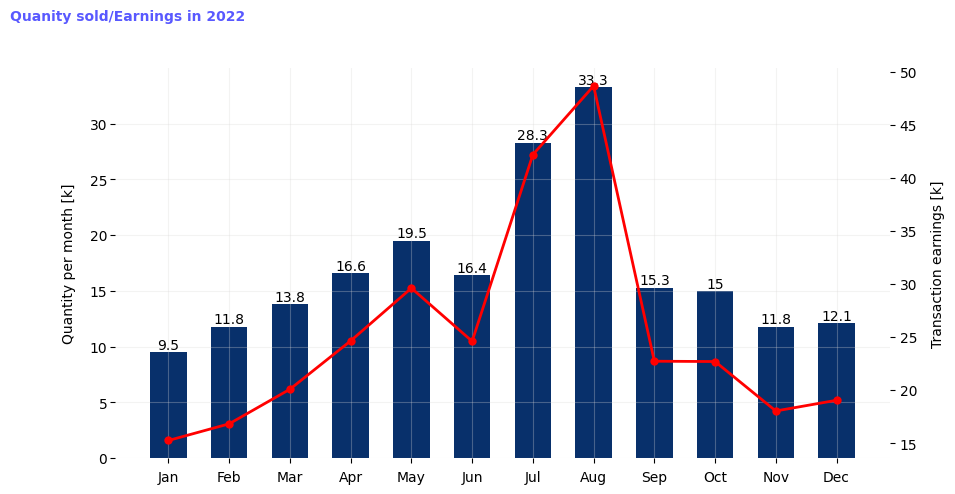

In [21]:
cmap = mpl.colormaps['Blues']
fig, ax = plt.subplots(figsize=(10, 6), dpi = 100)
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.3, zorder=0)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.3, zorder=0)

ax.set_xlabel('', fontsize=12, labelpad=10)
ax.xaxis.set_label_position("bottom")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_tick_params(pad=5, labelbottom=True, bottom=True, labelsize=10, labelrotation=0)

#text
ax.set_xticks(range(len(month22_dataset['Months'])))
ax.set_xticklabels(month22_dataset['Months'])
ax.spines[['top','left','bottom','right']].set_visible(False)
ax.text(x=0.02, y=.93, s='Quanity sold/Earnings in 2022', transform=fig.transFigure, fontsize=10, weight='bold', alpha=.65, font='sans serif', color='blue')
    
#y axis
ax.set_ylabel('Quantity per month [k]', fontsize=10, labelpad=10)
ax.yaxis.set_label_position("left")
ax.yaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=10)
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85, wspace=None, hspace=None)



bar_container = ax.bar(month22_dataset['Months'], month22_dataset['Quantity'], width=0.6, color=cmap(np.linalg.norm(month22_dataset['Quantity'])))
ax.bar_label(bar_container,fontsize=10)


ax2 = ax.twinx()
ax2.spines[['top','left','bottom','right']].set_visible(False)
ax2.plot(earnings_dataset['Months'], earnings_dataset['Transaction earnings'], color='red', marker='o', linewidth=2, markersize=6, markeredgecolor='none')


ax2.set_ylabel('Transaction earnings [k]', fontsize=10, labelpad=10)



# Wyświetlamy wykres
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85, wspace=None, hspace=None)
plt.show()

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(dataset['Day name'])
dataset['Day name numeric']=le.transform(dataset['Day name'])
predict_sale=dataset
predict_sale = predict_sale.drop(columns=['ticket_number','Day name','Month','Year','Day'])
predict_sale['price'] = predict_sale['price'].astype(float)
predict_sale['Transaction earnings']=predict_sale.Quantity*predict_sale.price
predict_sale.head()

predict_sale=predict_sale.groupby('date').agg({'Quantity':'sum', 'Day name numeric':'first', 'Quarter':'first','time': 'nunique','Transaction earnings': ['mean', 'sum']}).reset_index()
predict_sale.rename(columns={'time':'unique transactions'})


#df['mean_transactions'] = predict_sale['Transaction earnings']['mean']
#df['sum_transactions'] = predict_sale['Transaction earnings']['sum']
#df['quanity'] = predict_sale['Quantity']
#df['day'] = predict_sale['Day name numeric']
#df['unique trans'] = predict_sale['time']
predict_sale.head()

date Quantity Day name numeric Quarter    time Transaction earnings  \
                  sum            first   first nunique                 mean   
0 2021-01-02    581.0                2       1     145             2.706438   
1 2021-01-03    564.0                3       1     171             2.704800   
2 2021-01-04    315.0                1       1     128             2.199524   
3 2021-01-05    309.0                5       1     135             2.194468   
4 2021-01-07    310.0                4       1     124             2.530233   

            
       sum  
0   987.85  
1  1014.30  
2   461.90  
3   515.70  
4   544.00

In [45]:
import re
predict_sale = predict_sale.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
train = predict_sale.loc[predict_sale.date < '2022-07-11']
test = predict_sale.loc[predict_sale.date >= '2022-07-11']

Creating the model and doing predictionfrom sklearn.linear_model import LinearRegression
import numpy as np

In [46]:
import xgboost as xgb
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:squarederror',
                       max_depth=3,
                       learning_rate=0.01)
X_train = train.iloc[:,1:-1]
X_test = test.iloc[:,1:-1]
y_train = train.iloc[:,-1]
y_test= test.iloc[:,-1]

reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:943.11503	validation_1-rmse:1501.84015
[100]	validation_0-rmse:359.76414	validation_1-rmse:673.54656
[200]	validation_0-rmse:144.50134	validation_1-rmse:345.66372
[300]	validation_0-rmse:66.43411	validation_1-rmse:207.32015
[400]	validation_0-rmse:39.73470	validation_1-rmse:151.14279
[500]	validation_0-rmse:31.56236	validation_1-rmse:128.99285
[600]	validation_0-rmse:28.57326	validation_1-rmse:116.57412
[700]	validation_0-rmse:27.27125	validation_1-rmse:111.04290
[800]	validation_0-rmse:26.46573	validation_1-rmse:108.81534
[900]	validation_0-rmse:25.81731	validation_1-rmse:107.65242
[999]	validation_0-rmse:25.24204	validation_1-rmse:106.29443


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

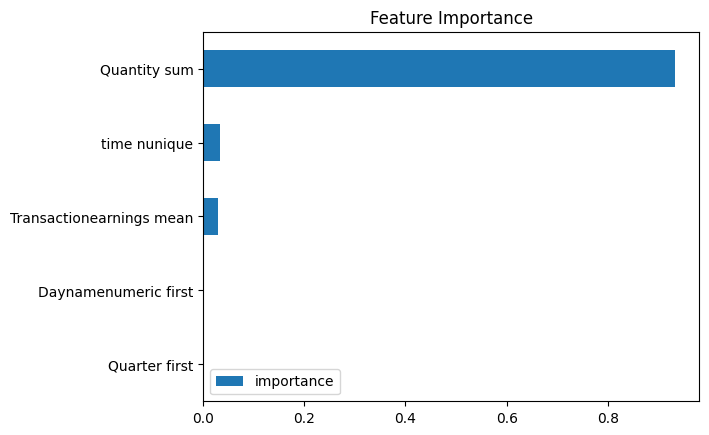

In [47]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_26404\4132600046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


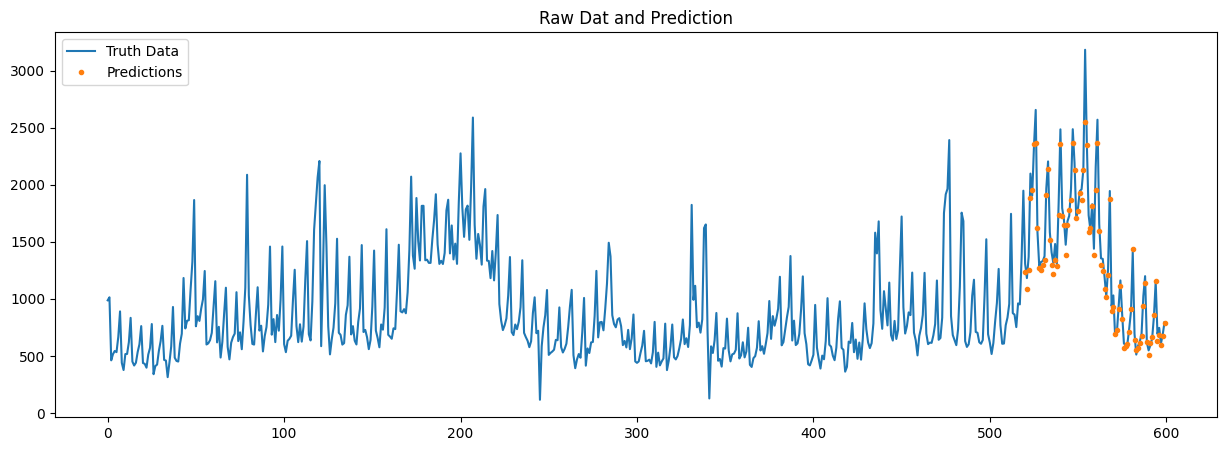

In [48]:
test['prediction'] = reg.predict(X_test)
df = predict_sale.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = predict_sale.iloc[:,-1].plot(figsize=(15, 5))
test['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

Using LightGBM Regression to solve the problem

In [63]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learnnig_rage': 0.05,
    'metric': {'l2','l1'},
    'verbose': -1
}


lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)


new_columns = ['_'.join(col).strip() for col in X_train.columns.values]
X_train.columns = new_columns
X_test.columns = new_columns


model = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)

MSE: 31116.37
RMSE: 176.40


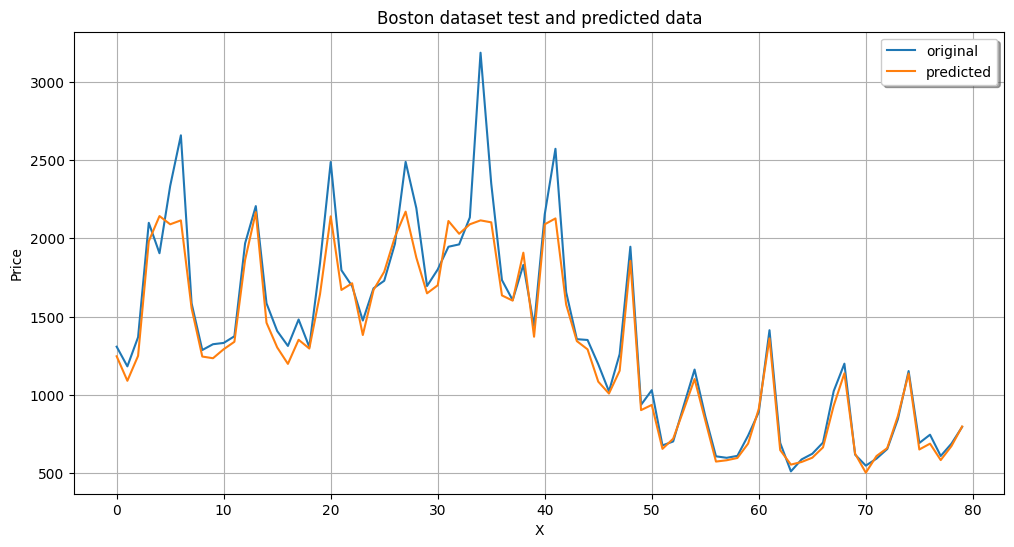

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

ValueError: Image size of 83004x455 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

In [64]:
 x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Boston dataset test and predicted data")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

# plotting feature importance
lgb.plot_importance(model, height=.5) 